<a href="https://colab.research.google.com/github/Gatiwi93/Machine-Learning/blob/main/Practica_1/Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1

##Load libraries

In [3]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Data

In [5]:
url = '/content/drive/MyDrive/Recursos-ML/Producción_Cultivos_ProductosGanaderia_S_Todos_los_Datos_NOFLAG.csv'
source_data = pd.read_csv(url, encoding='latin1')
print(f'Shape: {source_data.shape}')

Shape: (79606, 71)


In [6]:
source_data.head(1)

,Código del área,Código del área (M49),Área,Código del producto,Código del producto (CPC),Producto,Código del elemento,Elemento,Unidad,Y1961,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afganistán,268,'21631.01,"Aceite de girasol, en bruto",5510,Producción,toneladas,2937.75,...,137.68,960.46,1035.28,1804.72,3167.46,3198.89,3130.58,2511.67,2013.48,NaN


In [7]:
source_data.tail(1)

,Código del área,Código del área (M49),Área,Código del producto,Código del producto (CPC),Producto,Código del elemento,Elemento,Unidad,Y1961,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
79605,5817,'902,Import netos alim en Des,1746,'F1746,Vacas y búfalos,5111,Existencias,Cabeza,184678287.0,...,457089548.0,468137726.0,477840366.0,489005172.0,494048920.0,494970628.0,505975948.0,521704826.0,526230912.0,539044583.0


In [8]:
#Obtiene una lista de los nombres de las columnas del DataFrame
source_data.columns

Index(['Código del área', 'Código del área (M49)', 'Área',
       'Código del producto', 'Código del producto (CPC)', 'Producto',
       'Código del elemento', 'Elemento', 'Unidad', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [9]:
# Se define una lista que contiene los nombres de las columnas que no se desean incluir en el conjunto de datos final.
non_important_features = ['Código del área', 'Código del área (M49)',
                          'Código del producto', 'Código del producto (CPC)',
                          'Código del elemento']

source_data[non_important_features].columns
# Devuelve todas las columnas en source_data que no están en la lista non_important_features
source_data.columns.difference(non_important_features)
# Se crea un nuevo DataFrame llamado data que contiene solo las columnas de source_data que no están en la lista non_important_features
data = source_data[source_data.columns.difference(non_important_features)]
print(f'Shape: {data.shape}')
# Proporciona una lista de las columnas finales que se conservarán en el DataFrame data
print(data.columns)

Shape: (79606, 66)
Index(['Elemento', 'Producto', 'Unidad', 'Y1961', 'Y1962', 'Y1963', 'Y1964',
       'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972',
       'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980',
       'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988',
       'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
       'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004',
       'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020',
       'Y2021', 'Y2022', 'Área'],
      dtype='object')


In [10]:
data.head(1)

,Elemento,Producto,Unidad,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Área
0,Producción,"Aceite de girasol, en bruto",toneladas,2937.75,3137.75,3137.75,3137.75,3237.75,3437.75,3438.5,...,960.46,1035.28,1804.72,3167.46,3198.89,3130.58,2511.67,2013.48,NaN,Afganistán


In [11]:
data_features = data.columns
data_features

Index(['Elemento', 'Producto', 'Unidad', 'Y1961', 'Y1962', 'Y1963', 'Y1964',
       'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972',
       'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980',
       'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988',
       'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
       'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004',
       'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020',
       'Y2021', 'Y2022', 'Área'],
      dtype='object')

##Process Data


A continuación, se separan las características del conjunto de datos en dos tipos: categóricas y numéricas.

In [12]:
# Contiene los nombres de las columnas que se consideran características categóricas en el conjunto de datos
categorical_features = ['Área', 'Elemento', 'Producto', 'Unidad']
# Contendrá los nombres de las columnas que no son categóricas, es decir, las características numéricas
numerical_features = data_features.difference(categorical_features)
# Muestra cuántas características hay en total, cuántas son categóricas y cuántas son numéricas
print(f'data_features: {len(data_features)} categorical_features: {len(categorical_features)} numerical_features: {len(numerical_features)}')
#  Se imprime el tipo de datos de las variables
print(f'data_features: {type(data_features)} categorical_features: {type(categorical_features)} numerical_features: {type(numerical_features)}')

data_features: 66 categorical_features: 4 numerical_features: 62
data_features: <class 'pandas.core.indexes.base.Index'> categorical_features: <class 'list'> numerical_features: <class 'pandas.core.indexes.base.Index'>


In [13]:
numerical_data = data[numerical_features].replace({np.nan : 0})
categorical_data = data[categorical_features].replace({np.nan : 'unknown'})

numerical_data.shape, categorical_data.shape

((79606, 62), (79606, 4))

In [14]:
numerical_data.head(1)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2937.75,3137.75,3137.75,3137.75,3237.75,3437.75,3438.5,3537.75,3637.75,3437.0,...,137.68,960.46,1035.28,1804.72,3167.46,3198.89,3130.58,2511.67,2013.48,0.0


In [15]:
categorical_data.head(1)

,Área,Elemento,Producto,Unidad
0,Afganistán,Producción,"Aceite de girasol, en bruto",toneladas


##Preprocesamiento de los datos numéricos

Preprocesamiento con StandardScaler

In [16]:
scaler = StandardScaler()
scaler

StandardScaler()

In [17]:
scaler.fit(numerical_data)

StandardScaler()

In [18]:
print(scaler.mean_)

[1105318.49810353 1130403.80877283 1154577.77776248 1188857.55190865
 1213114.64106286 1244246.822588   1276477.00430545 1297259.7200348
 1300683.30485893 1329793.55318318 1358341.04134914 1362009.59589076
 1396505.03003128 1410445.17205173 1437941.19628093 1466003.22398638
 1493275.18522285 1539512.08079215 1556173.63778296 1573711.89276462
 1611740.58267894 1648539.41746363 1654874.41420596 1699462.90226403
 1719052.27396302 1743319.02330239 1766287.53889594 1789363.32187838
 1844157.82488745 1881891.85256651 1871949.01019232 1914403.39634173
 1913259.80164761 1954499.71556503 1987699.16803093 2032075.47746979
 2049229.92456536 2090012.06475844 2136914.71737859 2159122.5905997
 2174305.4212793  2209113.28528867 2254051.91766349 2322789.73311798
 2360164.15030086 2404246.38601852 2472343.70402859 2539421.00140731
 2556608.81279828 2611963.74379594 2679472.50944652 2710224.91195953
 2786046.29965241 2832988.75898173 2859367.39736012 2900512.14790795
 2950815.63070623 2971037.80256765 2

In [19]:
numerical_data_preprocessed = scaler.transform(numerical_data)
numerical_data_preprocessed

array([[-0.08170223, -0.0820734 , -0.08231475, ..., -0.08556038,
        -0.08518179, -0.08311888],
       [-0.08175299, -0.08216526, -0.08240818, ..., -0.08556502,
        -0.08517949, -0.08311888],
       [-0.08154958, -0.08174008, -0.08169966, ..., -0.08539431,
        -0.08501052, -0.08311888],
       ...,
       [-0.07804807, -0.0784724 , -0.07880722, ..., -0.08284801,
        -0.08245277, -0.08037187],
       [ 2.58709661,  2.61067962,  2.59585468, ...,  6.20500712,
         6.30920094,  6.4531452 ],
       [13.60539009, 13.61430869, 13.64782722, ..., 14.7562109 ,
        14.4845313 , 14.53719215]])

Preprocesamiento con QuantileTransformer

In [20]:
qt = QuantileTransformer()
qt

QuantileTransformer()

In [21]:
qt.fit(numerical_data)

QuantileTransformer()

In [22]:
numerical_data_preprocessed_qt = qt.transform(numerical_data)
numerical_data_preprocessed_qt

array([[0.49127345, 0.50354361, 0.50396669, ..., 0.33185546, 0.31718002,
        0.        ],
       [0.47609591, 0.46585513, 0.46589146, ..., 0.32795964, 0.32042546,
        0.        ],
       [0.53250265, 0.58020578, 0.61998942, ..., 0.4247974 , 0.42467084,
        0.        ],
       ...,
       [0.74827643, 0.754896  , 0.74837895, ..., 0.69705116, 0.69913671,
        0.72111383],
       [0.99308562, 0.99441926, 0.99432327, ..., 0.99770842, 0.99763268,
        0.99699725],
       [0.99900649, 0.99906948, 0.99903549, ..., 0.9992099 , 0.99904022,
        0.99894331]])

Preprocesamiento con MinMaxScaler



In [24]:
mms = MinMaxScaler()
mms

MinMaxScaler()

In [25]:
mms.fit(numerical_data)

MinMaxScaler()

In [26]:
numerical_data_preprocessed_mms = mms.transform(numerical_data)
numerical_data_preprocessed_mms

array([[2.18874055e-06, 2.30701382e-06, 2.29239188e-06, ...,
        8.36209497e-07, 6.55586734e-07, 0.00000000e+00],
       [1.67842557e-06, 1.37931891e-06, 1.33755432e-06, ...,
        7.81858727e-07, 6.82637485e-07, 0.00000000e+00],
       [3.72322444e-06, 5.67302252e-06, 8.57831271e-06, ...,
        2.77965656e-06, 2.66965645e-06, 0.00000000e+00],
       ...,
       [3.89223671e-05, 3.86716614e-05, 3.81379782e-05, ...,
        3.25785012e-05, 3.27487304e-05, 3.31022570e-05],
       [2.68304806e-02, 2.71950105e-02, 2.73721315e-02, ...,
        7.36180494e-02, 7.51984596e-02, 7.87639143e-02],
       [1.37592666e-01, 1.38314902e-01, 1.40318948e-01, ...,
        1.73691022e-01, 1.71340170e-01, 1.76179070e-01]])

##Preprocesamiento de los datos categóricos

Preprocesamiento con LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(data[categorical_features]['Producto'])

LabelEncoder()

In [28]:
le.classes_

array(['Abaca, cañamo de manila en bruto', 'Abejas',
       'Aceite de colza, en bruto', 'Aceite de girasol, en bruto',
       'Aceite de sésamo', 'Aceite, algodón', 'Aceite, almendra de palma',
       'Aceite, copra', 'Aceite, cártamo, alazor', 'Aceite, linaza',
       'Aceite, maní', 'Aceite, maíz', 'Aceite, nuez de palma',
       'Aceite, oliva', 'Aceite, palma', 'Aceite, soja',
       'Aceitunas, olivas', 'Agave, fibras en bruto n.c.p.', 'Aguacates',
       'Ajo verde',
       'Ajíes y pimientos secos (caspicum y pimenta), en bruto',
       'Ajíes y pimientos, verdes (capsicum y pimenta)', 'Albaricoques',
       'Alcachofas', 'Algarrobas', 'Algodón con semilla, sin desmotar',
       'Almendra de palma', 'Almendras con cáscara', 'Alpiste',
       'Altramuz',
       'Anís, badiana, cilantro, comino, alcaravea, hinojo y bayas de enebro, en bruto',
       'Arroz', 'Arándanos', 'Arándanos trepadores', 'Asnos',
       'Avellanas con cáscara', 'Avena', 'Aves de corral', 'Azucar, caña',
  

In [29]:
le.transform(data[categorical_features]['Producto'])

array([  3,   4,   5, ..., 262, 262, 291])

Preprocesamiento con OrdinalEncoder

In [30]:
enc = OrdinalEncoder()
enc.fit(data[categorical_features])

OrdinalEncoder()

In [31]:
enc.categories_

[array(['Afganistán', 'Albania', 'Alemania', 'América central',
        'América del Sur', 'América septentrional', 'Américas', 'Angola',
        'Antigua y Barbuda', 'Arabia Saudita', 'Argelia', 'Argentina',
        'Armenia', 'Asia', 'Asia central', 'Asia meridional',
        'Asia occidental', 'Asia oriental', 'Asia sudoriental',
        'Australia', 'Australia y Nueva Zelandia', 'Austria', 'Azerbaiyán',
        'Bahamas', 'Bahrein', 'Bangladesh', 'Barbados', 'Belarús',
        'Belice', 'Benin', 'Bhután', 'Bolivia (Estado Plurinacional de)',
        'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei Darussalam',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Bélgica',
        'Bélgica-Luxemburgo', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá',
        'Chad', 'Checoslovaq', 'Chequia', 'Chile', 'China',
        'China, Continental', 'China, RAE de Hong Kong',
        'China, RAE de Macao', 'China, Taiwán provincia de', 'Chipre',
        'Colombia', 'Comoras', 'Congo', 'Costa Rica

In [32]:
enc.transform(data[categorical_features])

array([[  0.,   4.,   3.,  11.],
       [  0.,   4.,   4.,  11.],
       [  0.,   4.,   5.,  11.],
       ...,
       [105.,   5., 262.,   3.],
       [105.,   4., 262.,  11.],
       [105.,   2., 291.,   7.]])

Preprocesamiento con OneHotEncoder

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(data[categorical_features])
type(encoder.categories_[0])

numpy.ndarray

In [39]:
encoder.categories_

[array(['Afganistán', 'Albania', 'Alemania', 'América central',
        'América del Sur', 'América septentrional', 'Américas', 'Angola',
        'Antigua y Barbuda', 'Arabia Saudita', 'Argelia', 'Argentina',
        'Armenia', 'Asia', 'Asia central', 'Asia meridional',
        'Asia occidental', 'Asia oriental', 'Asia sudoriental',
        'Australia', 'Australia y Nueva Zelandia', 'Austria', 'Azerbaiyán',
        'Bahamas', 'Bahrein', 'Bangladesh', 'Barbados', 'Belarús',
        'Belice', 'Benin', 'Bhután', 'Bolivia (Estado Plurinacional de)',
        'Bosnia y Herzegovina', 'Botswana', 'Brasil', 'Brunei Darussalam',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Bélgica',
        'Bélgica-Luxemburgo', 'Cabo Verde', 'Camboya', 'Camerún', 'Canadá',
        'Chad', 'Checoslovaq', 'Chequia', 'Chile', 'China',
        'China, Continental', 'China, RAE de Hong Kong',
        'China, RAE de Macao', 'China, Taiwán provincia de', 'Chipre',
        'Colombia', 'Comoras', 'Congo', 'Costa Rica

In [47]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [48]:
pd.DataFrame(numerical_data_preprocessed).isnull().sum().sum()

0

In [49]:
pd.DataFrame(numerical_data_preprocessed)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,-0.081702,-0.082073,-0.082315,-0.082277,-0.082194,-0.082140,-0.082347,-0.082440,-0.082589,-0.082847,...,-0.083319,-0.083813,-0.083737,-0.083825,-0.084272,-0.084278,-0.085119,-0.085560,-0.085182,-0.083119
1,-0.081753,-0.082165,-0.082408,-0.082306,-0.082223,-0.082159,-0.082353,-0.082437,-0.082606,-0.082844,...,-0.083283,-0.083804,-0.083742,-0.083847,-0.084331,-0.084334,-0.085168,-0.085565,-0.085179,-0.083119
2,-0.081550,-0.081740,-0.081700,-0.081942,-0.081876,-0.081940,-0.082079,-0.082307,-0.082346,-0.082571,...,-0.083181,-0.083698,-0.083600,-0.083686,-0.084243,-0.084184,-0.084973,-0.085394,-0.085011,-0.083119
3,-0.081658,-0.082032,-0.082335,-0.082260,-0.082120,-0.082037,-0.082248,-0.082506,-0.082629,-0.082709,...,-0.083301,-0.083818,-0.083610,-0.083348,-0.083799,-0.083654,-0.084434,-0.085177,-0.084989,-0.083119
4,-0.081914,-0.082295,-0.082533,-0.082488,-0.082409,-0.082362,-0.082564,-0.082659,-0.082816,-0.083055,...,-0.083307,-0.083821,-0.083746,-0.083856,-0.084341,-0.084346,-0.085185,-0.085611,-0.085217,-0.083119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79601,-0.060297,-0.060805,-0.060873,-0.060994,-0.059809,-0.060203,-0.060505,-0.059711,-0.060104,-0.060268,...,-0.039989,-0.040144,-0.040315,-0.041174,-0.041465,-0.041057,-0.044822,-0.045265,-0.048367,-0.083119
79602,0.428970,0.429705,0.430546,0.417933,0.423657,0.403638,0.406427,0.405699,0.434747,0.454713,...,0.501966,0.491864,0.500675,0.513515,0.531943,0.535514,0.528374,0.557226,0.550519,0.562238
79603,-0.078048,-0.078472,-0.078807,-0.078816,-0.078763,-0.078782,-0.078991,-0.079136,-0.079351,-0.079645,...,-0.080518,-0.081060,-0.081005,-0.081179,-0.081741,-0.081626,-0.082370,-0.082848,-0.082453,-0.080372
79604,2.587097,2.610680,2.595855,2.570517,2.637321,2.550266,2.622813,2.622291,2.737772,2.858009,...,5.406946,5.326953,5.426775,5.489880,5.566716,5.902303,6.025299,6.205007,6.309201,6.453145


In [50]:
pca.fit(numerical_data_preprocessed)

PCA(n_components=2)

In [51]:
print(pca.explained_variance_ratio_)

[0.95426829 0.04004836]


In [52]:
print(pca.singular_values_)

[2170.2211555   444.59146636]


##Visualice los Datos

In [41]:
numerical_data_preprocessed

array([[-0.08170223, -0.0820734 , -0.08231475, ..., -0.08556038,
        -0.08518179, -0.08311888],
       [-0.08175299, -0.08216526, -0.08240818, ..., -0.08556502,
        -0.08517949, -0.08311888],
       [-0.08154958, -0.08174008, -0.08169966, ..., -0.08539431,
        -0.08501052, -0.08311888],
       ...,
       [-0.07804807, -0.0784724 , -0.07880722, ..., -0.08284801,
        -0.08245277, -0.08037187],
       [ 2.58709661,  2.61067962,  2.59585468, ...,  6.20500712,
         6.30920094,  6.4531452 ],
       [13.60539009, 13.61430869, 13.64782722, ..., 14.7562109 ,
        14.4845313 , 14.53719215]])

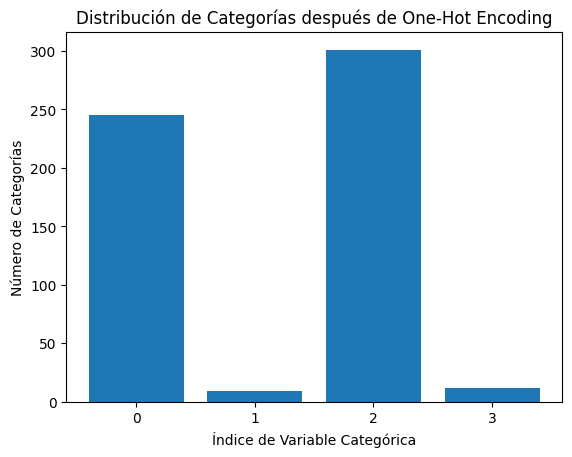

In [44]:
categories = enc.categories_

category_counts = [len(category) for category in categories]

plt.bar(range(len(category_counts)), category_counts, tick_label=range(len(category_counts)))
plt.xlabel('Índice de Variable Categórica')
plt.ylabel('Número de Categorías')
plt.title('Distribución de Categorías después de One-Hot Encoding')
plt.show()

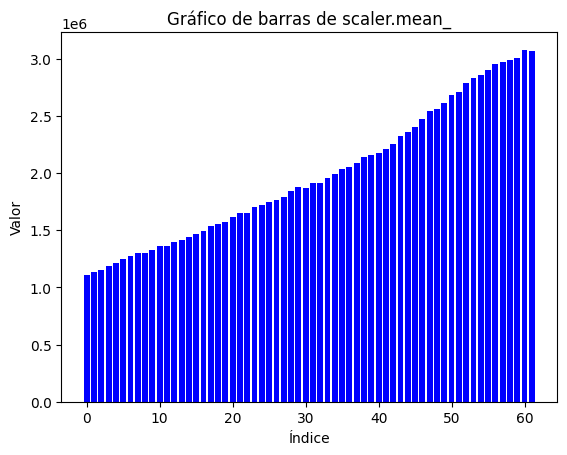

In [46]:
mean_values = scaler.mean_

# Crear un gráfico de barras
plt.bar(range(len(mean_values)), mean_values, color='blue')

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de barras de scaler.mean_')

# Mostrar el gráfico
plt.show()

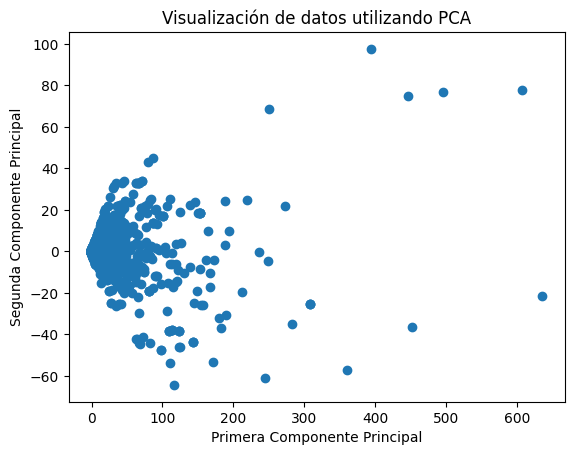

In [60]:
X_pca = pca.fit_transform(numerical_data_preprocessed)

# Graficar las proyecciones en el espacio de las dos primeras componentes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Visualización de datos utilizando PCA')
plt.show()